In [1]:
import qiskit
from qiskit import QuantumCircuit, transpile, Aer, BasicAer, IBMQ, execute, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.visualization import plot_bloch_multivector
import pandas as pd
#import matplotlib as mpl
from math import pi
import numpy as np
import matplotlib.pyplot as plt


IBMQ.save_account('0c5f09afe94bb9159f65f3ae983bdad4fd4fe1ef0fe97a1f9167ffc44c733c5ccb21d848987d3c1796fc3a40e2143fc5f902ddb2526a3df548c3b0ea53cba38f')
provider = IBMQ.load_account()

configrc.store_credentials:WARNING:2021-10-03 14:45:20,745: Credentials already present. Set overwrite=True to overwrite.


In [2]:
def A(n):
    
    qc = QuantumCircuit(n)
          
    qc.ry(np.pi/4, 1)
    qc.rx(np.pi/3 , 0)
    qc.rz(np.pi/3 , 2)
    qc.rz(np.pi/3 , 3)
    #qc.x(0)
    
    for i in range(n):
        qc.h(i)
    
    AA = qc.to_gate()
    AA.name = 'A'
    
    return AA

In [3]:
def Ad(n):
    
    qc = QuantumCircuit(n)
    
    for i in range(n):
        qc.h(i)
    
    #qc.h(0)
    qc.ry(-np.pi/4, 1)
    qc.rx(-np.pi/3 , 0)
    qc.rz(-np.pi/3 , 2)
    qc.rz(-np.pi/3 , 3)
    #qc.x(0)
      
    AAd = qc.to_gate()
    
    return AAd

In [29]:
def Oracle(n,sol,m):
    
    qc = QuantumCircuit(n)
    
    for ix in range(m):
        if(sol[ix]<2**n):
          
            for q in range(n):
                if (((sol[ix] >> q) & 1) == 0):
                    qc.x(q)

            ctr = []
            for k in range(n-1):
                ctr.append(k)

            qc.h(n-1)
            qc.mct(ctr,n-1)
            qc.h(n-1)

            for qi in range(n):
                if (((sol[ix] >> qi) & 1) == 0):
                    qc.x(qi)
                
    Or = qc.to_gate()
    Or.name = 'R0'
    
    qc.barrier()
    
    return Or

In [30]:
def Diff(n):
    
    qc = QuantumCircuit(n)
    
    for i in range(n):
        qc.h(i)
        
    for j in range(n):
        qc.x(j)
        
    ctr = []
    for k in range(1,n):
        ctr.append(k)

    qc.h(0)
    qc.mct(ctr,0)
    qc.h(0)

    
    for l in range(n):
        qc.x(l)
        
    for m in range(n):
         qc.h(m)
    
    Di = qc.to_gate()
    Di.name = 'Rx'
    
    
    return Di

In [31]:
# get custom solutions for ex getting even numbers:

def sol(n):
    sol = []
    for i in range(n):
        if i%2==0:
            sol.append(i)
    return sol        


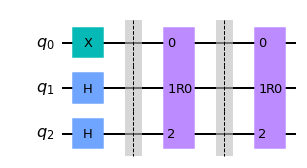

In [59]:
sol = [2]

#sol = [16,18,19]

m = 1
n = 3

qc = QuantumCircuit(n)

#Preparing initial state (A|0>)

#qc.h(0)

def num_iterations(m, n):
    amplitude = np.sqrt(m/(2**n))
    return round(np.arccos(amplitude) / (2 * np.arcsin(amplitude)))

#reps = num_iterations(m, n)
reps = 2

# #qc.append(A(n),list(range(n)))

qc.x(0)
qc.h(1)
qc.h(2)

# # qc.h(1)
# # qc.h(2)
# # qc.h(0)

for rep in range(reps):
#     qc.h(1)
#     qc.h(2)
#     qc.x(0)
    
    qc.barrier()
    
    qc.append(Oracle(n, sol, m), list(range(n)))
    
# #     qc.h(1)
# #     qc.h(2)
# #     qc.x(0)
    
    #qc.append(Diff(n), list(range(n)))

#qc.measure_all()

qc.draw('mpl')

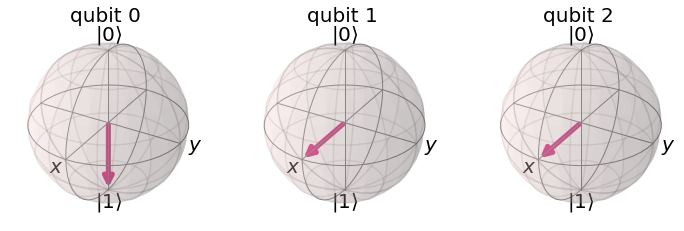

In [60]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
state = job.result().get_statevector()
plot_bloch_multivector(state)

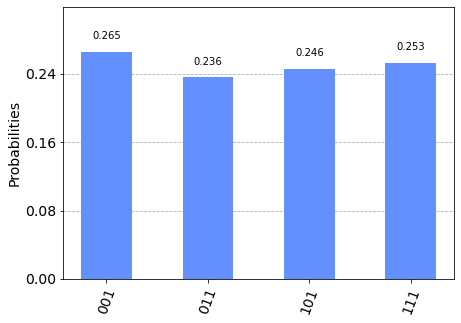

In [51]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc,backend,shots = 1000)
counts = job.result().get_counts()
plot_histogram(counts)